# 참-거짓 판단, 로지스틱 회귀

딥러닝은 '로지스틱 회귀'와 같은 미니 판단 장치들을 사용하여 내부에서 복잡한 연산을 끝낸 후 최적의 예측 값을 내놓는 작업이다.

## 로지스틱 회귀의 정의

위에서 설명한 딥러닝의 값인 참과 거짓 중 하나를 내놓는 과정은 로지스틱 회귀의 원리를 거쳐 이루어진다.
아래의 그래프는 해당 표를 기반으로 그린 표이다.
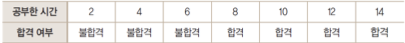

In [1]:
#예제 데이터로 [0]은 공부한 시간을, [1]은 합격여부를 나타냄(0:불합격, 1:합격)
data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

x_data = [i[0] for i in data] #공부한 시간
y_data = [i[1] for i in data] #합격 여부

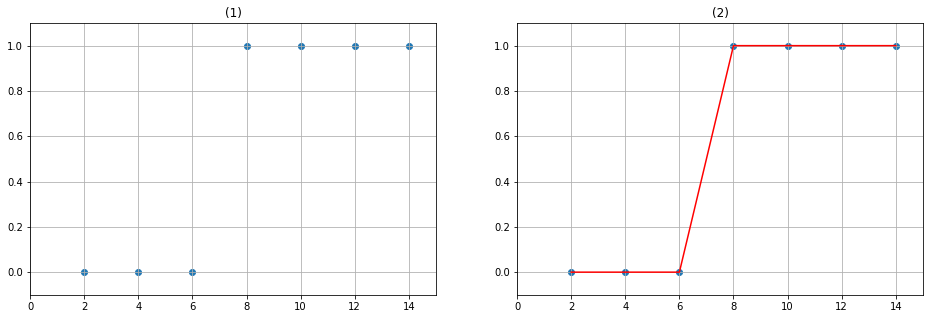

In [2]:
import matplotlib.pyplot as plt

#위의 데이터를 기반으로 만든 그래프
plt.figure(figsize=(16,5))

#(1) 합격을 1, 불합격을 0이라고 했을때 좌표 평면에 표현한 것.
plt.subplot(1,2,1)##plt.subplot(nrows(열), ncols(행), index)
plt.title('(1)')
plt.scatter(x_data, y_data)
plt.xlim(0,15) #x축의 값 지정
plt.ylim(-.1,1.1) #y축의 값
plt.grid()

#(2)선을 그어 이 점의 특성을 만들어야 하기때문에 다음과 같이 S자 형태의 그래프를 그려야함.
plt.subplot(1,2,2)
plt.title('(2)')
plt.scatter(x_data, y_data)
plt.plot(x_data, y_data,'r-')
plt.xlim(0,15) #x축의 값 지정
plt.ylim(-.1,1.1) #y축의 값
plt.grid()

plt.show()

## 시그모이드 함수, 로그함수

시그모이드 함수는 그래프가 S자 형태로 그려지는 함수. 
y = 1 / 1 + (e** - (ax+b)) 와 같은 형태를 가지고있고,
여기서도 a는 기울기, b = y의 절편과 같은 형태로 좌우 이동을 의미함.
오차는 0~1의 사이. 실제값이 1에 가까울수록 오차는 0에 가까움. 
이것을 공식으로 만들 수 있게 해주는 함수가 로그 함수.

In [3]:
#예제 작성 전 기울기 a와 절편 b의 값을 초기화
import numpy as np
import pandas as pd
a = 0; b = 0;

In [4]:
#학습률과 반복횟수를 설정
lr = 0.05 ; epochs=2001;

In [5]:
#시그모이드 함수를 파이썬코드로 옮긴것.
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

Epoch : 0 , 기울기 -0.0500, 절편 : -0.0250
Epoch : 0 , 기울기 -0.1388, 절편 : -0.0472
Epoch : 0 , 기울기 -0.2268, 절편 : -0.0619
Epoch : 0 , 기울기 0.1201, 절편 : -0.0185
Epoch : 0 , 기울기 0.2374, 절편 : -0.0068
Epoch : 0 , 기울기 0.2705, 절편 : -0.0040
Epoch : 0 , 기울기 0.2860, 절편 : -0.0029
Epoch : 1000 , 기울기 1.4978, 절편 : -9.9401
Epoch : 1000 , 기울기 1.4940, 절편 : -9.9411
Epoch : 1000 , 기울기 1.4120, 절편 : -9.9547
Epoch : 1000 , 기울기 1.4949, 절편 : -9.9444
Epoch : 1000 , 기울기 1.4982, 절편 : -9.9440
Epoch : 1000 , 기울기 1.4984, 절편 : -9.9440
Epoch : 1000 , 기울기 1.4985, 절편 : -9.9440
Epoch : 2000 , 기울기 1.9065, 절편 : -12.9489
Epoch : 2000 , 기울기 1.9055, 절편 : -12.9491
Epoch : 2000 , 기울기 1.8515, 절편 : -12.9581
Epoch : 2000 , 기울기 1.9057, 절편 : -12.9514
Epoch : 2000 , 기울기 1.9068, 절편 : -12.9513
Epoch : 2000 , 기울기 1.9068, 절편 : -12.9513
Epoch : 2000 , 기울기 1.9068, 절편 : -12.9513


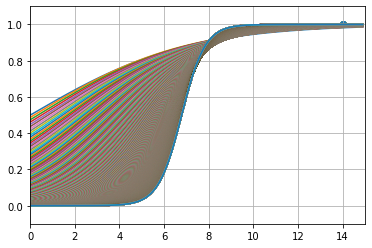

In [6]:
#경사하강법을 실행 하고 그 값을 추출(기울기, 절편)하여 그래프를 그림
for i in range(epochs):
    for x_data, y_data, in data:
        a_diff = x_data*(sigmoid(a * x_data + b) - y_data)
        b_diff = sigmoid(a * x_data + b) - y_data
        
        a = a - lr * a_diff
        b = b - lr * b_diff
        
        if i % 1000 == 0:
            print(f'Epoch : {i} , 기울기 {a:0.4f}, 절편 : {b:0.4f}')
    
    plt.scatter(x_data, y_data)
    plt.grid()
    plt.xlim(0, 15)
    plt.ylim(-.1, 1.1)
    x_range = (np.arange(0, 15, 0.1))
    plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.pause(0.001)
plt.show()